In [33]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [34]:
def logistic(z):
    result = 1 / (1 + (np.e ** (-z)))

    return result

In [35]:

def compute_cost(X, y, theta):
    m = X.shape[0]

    cost = (sum(y * (np.log(logistic(X @ theta))) + (1 - y) * np.log(1 - logistic(X @ theta))) / (-1 * m))

    return cost



In [36]:
def grad_desc(X, y, theta):
    m = X.shape[0]
    grad = ((logistic(X @ theta) - y) @ X) / m

    return grad

In [37]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

f:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
f:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Минимизация функции стоимости прошла успешно.
Функция стоимости при оптимальном theta = 0.2034977238792401 (должно быть ~0.203)


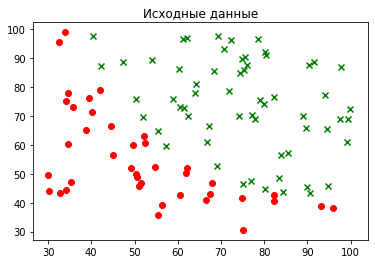

In [39]:
X, y = load_data('lab2data1.txt')

init_theta = np.array([0, 0, 0])

opt_theta_obj = minimize(lambda th: compute_cost(X, y, th), init_theta,
                         method='CG',
                         jac=lambda th: grad_desc(X, y, th),
                         options={'gtol': 1e-5, 'maxiter': 200, 'disp': False})


plt.title('Исходные данные')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
#plt.show()

print('Минимизация функции стоимости ' + ('прошла успешно.' if opt_theta_obj.success else 'не удалась.'))
opt_theta = opt_theta_obj.x

opt_cost = compute_cost(X, y, opt_theta)
print(f'Функция стоимости при оптимальном theta = {opt_cost} (должно быть ~0.203)')

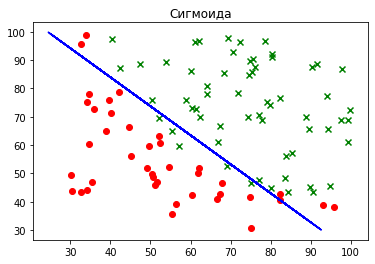

In [46]:
split_line = -opt_theta[0]/opt_theta[1] - opt_theta[2]/opt_theta[1] * X[:, 1]

plt.title('Построенная граница решений')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.plot(split_line, X[:, 1], c='b')


plt.title('Сигмоида')

plt.show()

